In [1]:
import numpy as np
import os
import utils
import time
from utils import loadmat
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
def feature_normalization(patch, type, epsilon=5e-5):
    if type == 'Sqrt Scaling':
        return np.sqrt(patch)
    elif type == 'L2-Norm':
        return patch / np.sqrt(np.sum(block ** 2) + epsilon)
    else:
        return -1

In [42]:
def feature_pixel(x):
    return x.reshape(-1, 1)

def feature_hog(x):
    pass

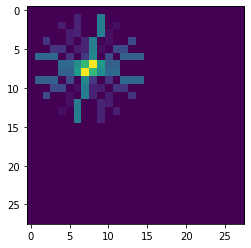

In [57]:
from skimage.feature import hog

fd, hog_image = hog(img, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, multichannel=False)

plt.imshow(hog_image)

In [10]:
.shape

(28, 28)

In [11]:
data = utils.loadmat('../data/digits-normal.mat') 

img = data['x'][:, :, 0]
# Apply Non Linear Mapping
img = np.sqrt(img)

# Computing the channel gradient
r_grad, c_grad = np.empty(img.shape).astype('double'), np.empty(img.shape).astype('double')

c_grad[:, 0], c_grad[:, -1] = 0, 0
r_grad[0, :], r_grad[-1, 0] = 0, 0

r_grad[1:-1,] = img[2:, :] - img[:-2, :] 
c_grad[:, 1:-1] = img[:, 2:] - img[:, :-2]

(28, 28)

In [29]:
# Calculating m, theta
img_magnitude, img_theta = np.empty(img.shape).astype('double'), np.empty(img.shape).astype('double')

img_magnitude = np.sqrt(r_grad**2 + c_grad**2)
img_theta = np.rad2deg(np.arctan(c_grad/(r_grad+0.00000001))) % 180 # Brings Angle between 0 -> 180 !!

In [28]:
np.max(img_theta)

179.13764175902008

In [ ]:
# Orientation Histogram Computation
windowSize = 

In [46]:
hist_bins = np.arange(10, 180, 20) #np.arange(0, 180, 180/8)

In [50]:
# Calculating the HOG histogram - Magnitude, Orientation , Bins
HOG_cell_hist = np.zeros(shape=(histogram_bin.size))
cell_size = img_theta.shape[0]

for r in range(cell_size):
    for c in range(cell_size):
        curr_direction, curr_magnitude = img_magnitude[r, c], img_theta[r, c]
        diff = np.abs(curr_direction - hist_bins)
        
        if curr_direction < hist_bins[0]:
            first_bin_idx = 0
            second_bin_idx = hist_bins.size-1
        elif curr_direction > hist_bins[-1]:
            first_bin_idx = hist_bins.size-1
            second_bin_idx = 0
        else:
            first_bin_idx = numpy.where(diff == numpy.min(diff))[0][0]
            temp = hist_bins[[(first_bin_idx-1)%hist_bins.size, (first_bin_idx+1)%hist_bins.size]]
            temp2 = numpy.abs(curr_direction - temp)
            res = numpy.where(temp2 == numpy.min(temp2))[0][0]
            if res == 0 and first_bin_idx != 0:
                second_bin_idx = first_bin_idx-1
            else:
                second_bin_idx = first_bin_idx+1
        first_bin_value = hist_bins[first_bin_idx]
        second_bin_value = hist_bins[second_bin_idx]
        HOG_cell_hist[first_bin_idx] = HOG_cell_hist[first_bin_idx] + (np.abs(curr_direction - first_bin_value)/(180.0/hist_bins.size)) * curr_magnitude
        HOG_cell_hist[second_bin_idx] = HOG_cell_hist[second_bin_idx] + (np.abs(curr_direction - second_bin_value)/(180.0/hist_bins.size)) * curr_magnitude



In [51]:
HOG_cell_hist

array([  8008.86744964,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        ,      0.        ,      0.        ,
       145843.59834943])

In [ ]:
normalized_blocks = normalized_blocks.ravel()

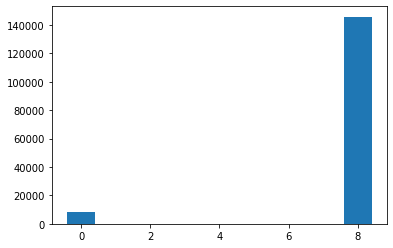

In [53]:
import matplotlib
import numpy
matplotlib.pyplot.bar(x=numpy.arange(9), height=HOG_cell_hist, align="center", width=0.8)
matplotlib.pyplot.show()